## Import modules

In [1]:
# sklearn
from sklearn.datasets import fetch_openml

import numpy as np

import matplotlib.pyplot as plt

## Loading data

In [6]:
%%time
full_data = fetch_openml("mnist_784")

CPU times: user 16.6 s, sys: 200 ms, total: 16.8 s
Wall time: 16.8 s


In [7]:
full_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [8]:
full_data['target'].shape

(70000,)

In [9]:
train_size = 60000
test_size = 10000

## Separate full_data to train and test

In [10]:
train_data = {'data': full_data['data'][:train_size], 'target': full_data['target'][:train_size]}
test_data = {'data': full_data['data'][train_size:], 'target': full_data['target'][train_size:]}

## Let's visualize first 10 digits from train:

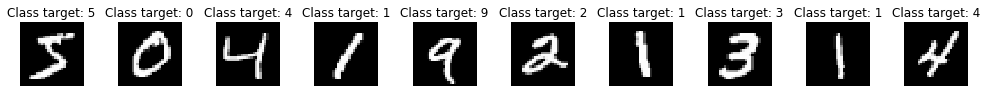

In [11]:
digits_to_show = 10
fig = plt.figure(figsize=(15, 15))
for i in range(digits_to_show):
    ax = fig.add_subplot(1, digits_to_show + 1, i+1)
    ax.imshow(train_data['data'][i].reshape(28, 28), cmap=plt.get_cmap('Greys_r'))
    ax.set_title('Class target: ' + train_data['target'][i])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [263]:
train_data['target'] = train_data['target'].astype(int)
test_data['target'] = test_data['target'].astype(int)

## Testing my KNNClassifier

In [12]:
from sklearn.neighbors import NearestNeighbors
from nearest_neighbors import KNNClassifier
import numpy as np
from distances import euclidean_distance, cosine_distance


n_test_samples = 1000

In [13]:
KNN_model = KNNClassifier(5, strategy='my_own', metric='euclidean', weights=False, test_block_size=44)

In [14]:
%%time
KNN_model.fit(X=train_data['data'][:5000], y=train_data['target'])

CPU times: user 293 µs, sys: 0 ns, total: 293 µs
Wall time: 174 µs


In [15]:
%%time
preds1 = KNN_model.predict(test_data['data'][:n_test_samples])

CPU times: user 7.98 s, sys: 160 ms, total: 8.14 s
Wall time: 1.03 s


In [16]:
sum(preds1.astype(int) - test_data['target'][:n_test_samples].astype(int) == 0) / test_data['target'][:n_test_samples].size

0.91

## Testing distances

In [17]:
import numpy as np
from distances import euclidean_distance, cosine_distance

In [18]:
x = np.array([[2, 3], [-1, 6], [10, 22]])
y = np.array([[1, 1], [-1, 2]])

In [19]:
cosine_distance(x, y)

array([[0.01941932, 0.50386106],
       [0.41876181, 0.04422099],
       [0.06367082, 0.37080177]])

In [20]:
%load_ext memory_profiler

In [21]:
%%time
%%memit
X = np.ones((2000, 1000)) * 5
print(euclidean_distance(np.ones((2000, 1000)) * 5, np.ones((500, 1000))))
#2.22 s - new on 200x500

#763 ms - old on 200x500
#7725.48 


[[126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 ...
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]]
[[126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 ...
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.49110641 ... 126.49110641 126.49110641
  126.49110641]
 [126.49110641 126.49110641 126.

In [22]:
%%time
std_norm = np.linalg.norm(X, axis=1)
print('done')

done
CPU times: user 37.3 ms, sys: 643 µs, total: 38 ms
Wall time: 5.94 ms


In [23]:
%%time
my_norm = np.sqrt(np.sum(X ** 2, axis=1))
print('done')

done
CPU times: user 18.1 ms, sys: 283 µs, total: 18.4 ms
Wall time: 2.44 ms


In [24]:
sum(std_norm != my_norm)

0

## Testing cross_validation

In [25]:
from cross_validation import *
from nearest_neighbors import KNNClassifier

In [26]:
%%time

knn_cross_val_score(train_data['data'][:1000],
                    train_data['target'][:1000],
                    k_list=[3, 5, 15, 20, 25, 50, 100, 250, 500],
                    score='accuracy',
                    cv=None,
                    k=5,
                    strategy='brute',
                    metric='euclidean',
                    weights=False,
                    test_block_size=1000
                   )

CPU times: user 477 ms, sys: 7.94 ms, total: 485 ms
Wall time: 64.7 ms


{3: array([0.84730539, 0.84984985, 0.84684685]),
 5: array([0.87125749, 0.81681682, 0.82282282]),
 15: array([0.87125749, 0.81681682, 0.82282282]),
 20: array([0.87125749, 0.81681682, 0.82282282]),
 25: array([0.87125749, 0.81681682, 0.82282282]),
 50: array([0.87125749, 0.81681682, 0.82282282]),
 100: array([0.87125749, 0.81681682, 0.82282282]),
 250: array([0.87125749, 0.81681682, 0.82282282]),
 500: array([0.87125749, 0.81681682, 0.82282282])}

In [27]:
knn_test = KNNClassifier(
                    k=500,
                    strategy='brute',
                    metric='euclidean',
                    weights=False,
                    test_block_size=1000)
knn_test.fit(train_data['data'][:800], train_data['target'][:800])

In [28]:
%%time
preds1 = knn_test.predict(train_data['data'][800:1000])

sum(preds1.astype(int) - train_data['target'][800:1000].astype(int) == 0) / train_data['target'][800:1000].size

CPU times: user 236 ms, sys: 4.3 ms, total: 240 ms
Wall time: 33.2 ms


0.23

In [29]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
knn_true = KNeighborsClassifier(5, algorithm='brute', weights='uniform', metric='euclidean')
knn_true.fit(train_data['data'][:800], train_data['target'][:800])

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
preds1 = knn_true.predict(train_data['data'][800:1000])

sum(preds1.astype(int) - train_data['target'][800:1000].astype(int) == 0) / train_data['target'][800:1000].size

0.87

## Experiments list

### Experiment №1

In [35]:
from sklearn.neighbors import NearestNeighbors
# from nearest_neighbors import KNNClassifier
import numpy as np
from distances import euclidean_distance, cosine_distance
from tqdm import tqdm
import time
import pandas as pd


import numpy as np
from sklearn.neighbors import NearestNeighbors
from distances import cosine_distance, euclidean_distance


class KNNClassifier:
    def __init__(self,
                 k=10,
                 strategy='my_own',
                 metric='euclidean',
                 weights=False,
                 test_block_size=10000
                 ):
        """
        params:
            * k - amount of nearest neighbours(nn)
            * strategy - nn searching algorithm. Possible values:
                - 'my_own' - self-realization
                - 'brute' - from sklearn.neighbors.NearestNeighbors(algorithm='brute')
                - 'kd_tree' - from sklearn.neighbors.NearestNeighbors(algorithm='kd_tree')
                - 'ball_tree' - from sklearn.neighbors.NearestNeighbors(algorithm='ball_tree')
            * metric:
                - 'euclidean' - euclidean metric
                - 'cosine' - cosine metric
            * weights - bool variable.
                - True - weighted KNN(with distance)
                - False - simple KNN
            * test_block_size - size of test block
        """

        self.X_train = None
        self.y_train = None
        self.distances = None
        self.neigh_idxs = None
        self.model = None
        self.k = k
        self.strategy = strategy
        self.metric = metric
        self.eps = 1e-5
        self.weights = weights
        if self.strategy == 'brute':
            self.model = NearestNeighbors(n_neighbors=self.k, algorithm=self.strategy, metric=self.metric)
        elif self.strategy != 'my_own':
            self.model = NearestNeighbors(n_neighbors=self.k, algorithm=self.strategy)
        else:
            self.model = None
        self.test_block_size = test_block_size

    def fit(self, X, y):
        """
        params:
            * X - train data
            * y - targets for train data
        """

        self.y_train = y.astype(int)
        self.k = np.min([self.y_train.shape[0], self.k])
        if self.strategy != 'my_own':
            self.model.fit(X, self.y_train)
        else:
            self.X_train = X

    def find_kneighbors(self, X, return_distance):
        """
        params:
            * X - objects sample
            * return_distance - bool variable

        return values:
            * If return_distance == True:
                * tuple with two numpy array with size (X.shape[0], k), where:
                  [i, j] elem of first array must be the distance between
                  i-th object and his j-th nearest neighbour
                  [i, j] elem of second array must be the index of j-th nearest neighbour to i-th object
            * If return_distance == False:
                * only second array
        """

        # split_size = X.shape[0] // self.test_block_size + \
            # int(X.shape[0] % self.test_block_size != 0)

        # for i, split in np.array_split(X, split_size):
        if self.strategy != 'my_own':
            self.distances, \
            self.neigh_idxs = self.model.kneighbors(X, n_neighbors=self.k)
        else:
            if self.metric == 'euclidean':
                self.distances = euclidean_distance(X, self.X_train)
                self.neigh_idxs = np.argsort(self.distances,
                                        axis=1)[:, :self.k]
                if return_distance:
                    self.distances = self.distances[np.arange(self.distances.shape[0])[:, None],
                                                    self.neigh_idxs]

            elif self.metric == 'cosine':
                self.distances = cosine_distance(X, self.X_train)
                self.neigh_idxs = np.argsort(self.distances,
                                        axis=1)[:, :self.k]
                if return_distance:
                    self.distances = self.distances[np.arange(self.distances.shape[0])[:, None],
                                                    self.neigh_idxs]
        if return_distance:
            return self.distances, self.neigh_idxs
        return self.neigh_idxs

    def predict(self, X):
        """
        params:
            * X - test objects

        return values:
            * numpy array with size X.shape[0] of predictions for test objects from X
        """

        if self.test_block_size > X.shape[0]:
            self.test_block_size = X.shape[0]
        preds = np.zeros(X.shape[0])
        split_size = X.shape[0] // self.test_block_size + \
                     int(X.shape[0] % self.test_block_size != 0)
        curr_idx = 0
        classes = np.array(np.unique(self.y_train))
        for i, split in enumerate(np.array_split(X, split_size)):
            self.distances, self.neigh_idxs = self.find_kneighbors(split, True)
            for j, idx in enumerate(self.neigh_idxs):
                counts = np.zeros(len(classes))
                for c in classes:
                    if self.weights:
                        weights = 1 / (self.distances[j] + self.eps)
                        counts[c] = np.sum((self.y_train[idx] == c) * weights)
                    else:
                        counts[c] = np.sum(self.y_train[idx] == c)
                preds[j + curr_idx] = np.argmax(counts)
            curr_idx += split.shape[0]
        return preds

    def predict_for_cv(self, X):
        """
        params:
            * X - test objects

        return values:

        """

        preds = np.zeros(X.shape[0])
        classes = np.array(np.unique(self.y_train))
        for j, idx in enumerate(self.neigh_idxs[:, :self.k]):
            # counts = np.zeros(len(classes))
            # for c in classes:
            if self.weights:
                weights = 1 / (self.distances[j, :self.k] + self.eps)
                counts = np.bincount(self.y_train[idx],  weights)
            else:
                counts = np.bincount(self.y_train[idx])
            preds[j] = np.argmax(counts)
        return preds



strategy_list = ['my_own', 'brute', 'kd_tree', 'ball_tree']
feature_dim_list = [10, 20, 100]
k_neighbors = 5

experiment1_results = pd.DataFrame(columns=['strategy', 'feature_dim', 'time_elapsed'])

for feature_dim in tqdm(feature_dim_list):
    features_idxs = np.random.choice(test_data['data'].shape[1],
                                     feature_dim,
                                     replace=False)
    for strategy in tqdm(strategy_list):
        knn = KNNClassifier(k_neighbors,
                            strategy)
        knn.fit(train_data['data'][:, features_idxs],
                train_data['target'])
        start = time.time()
        knn.find_kneighbors(test_data['data'][:, features_idxs], True)
        time_elapsed = time.time() - start
        experiment1_results = \
            experiment1_results.append({'feature_dim': feature_dim,
                                        'strategy': strategy,
                                        'time_elapsed': time_elapsed},
                                       ignore_index=True)
        
        
        



  0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/4 [00:00<?, ?it/s]


 25%|██▌       | 1/4 [00:40<02:01, 40.42s/it]


 50%|█████     | 2/4 [00:48<01:01, 30.75s/it]


 75%|███████▌  | 3/4 [00:51<00:22, 22.50s/it]


100%|██████████| 4/4 [00:55<00:00, 16.92s/it]

 33%|███▎      | 1/3 [00:55<01:51, 55.76s/it]


  0%|          | 0/4 [00:00<?, ?it/s]


 25%|██▌       | 1/4 [00:38<01:54, 38.28s/it]


 50%|█████     | 2/4 [00:47<00:58, 29.44s/it]


 75%|███████▌  | 3/4 [00:53<00:22, 22.45s/it]


100%|██████████| 4/4 [01:02<00:00, 18.40s/it]

 67%|██████▋   | 2/3 [01:57<00:57, 57.68s/it]


  0%|          | 0/4 [00:00<?, ?it/s]


 25%|██▌       | 1/4 [00:44<02:14, 44.99s/it]


 50%|█████     | 2/4 [00:54<01:08, 34.23s/it]


 75%|███████▌  | 3/4 [02:17<00:48, 48.88s/it]


100%|██████████| 4/4 [03:50<00:00, 62.28s/it]

100%|██████████| 3/3 [05:48<00:00, 109.60s/it]

## Got twice faster algorithm with this trick: https://stackoverflow.com/questions/20103779/index-2d-numpy-array-by-a-2d-array-of-indices-without-loops

In [36]:
experiment1_results

,strategy,feature_dim,time_elapsed
0,my_own,10,40.412636
1,brute,10,8.126442
2,kd_tree,10,0.773383
3,ball_tree,10,1.300307
4,my_own,20,38.278608
5,brute,20,8.711212
6,kd_tree,20,2.923622
7,ball_tree,20,5.743815
8,my_own,100,44.977277
9,brute,100,9.017841


In [126]:
experiment1_results.to_csv('experiment1_results.csv')

### Experiment №2

In [21]:
from sklearn.neighbors import NearestNeighbors
from nearest_neighbors import KNNClassifier
from cross_validation import *
import numpy as np
from distances import euclidean_distance, cosine_distance
from tqdm import tqdm
import time
import pandas as pd


n_folds = 3
k_list = [k for k in range(1, 11)]
metric_list = ['euclidean', 'cosine']

experiment2_results = pd.DataFrame(columns=['k_neighbors', 'metric', 'accuracy', 'elapsed_time'])


for metric in tqdm(metric_list):
    start = time.time()
    preds_dict = knn_cross_val_score(train_data['data'],
                                     train_data['target'],
                                     k_list=k_list,
                                     score='accuracy',
                                     k=k_list[-1],
                                     strategy='brute',
                                     metric=metric,
                                     weights=False
                                    )
    time_elapsed = time.time() - start
    for k in k_list:
        experiment2_results = \
            experiment2_results.append({'k_neighbors': k,
                                        'metric': metric,
                                        'accuracy': preds_dict[k],
                                        'elapsed_time': time_elapsed},
                                        ignore_index=True
                                      )
        
        

100%|██████████| 2/2 [03:25<00:00, 102.91s/it]


In [22]:
experiment2_results

,k_neighbors,metric,accuracy,elapsed_time
0,1,euclidean,"[96.895, 96.675, 96.67]",103.422209
1,2,euclidean,"[96.03, 95.99499999999999, 96.125]",103.422209
2,3,euclidean,"[96.955, 96.825, 96.71499999999999]",103.422209
3,4,euclidean,"[96.705, 96.67, 96.71]",103.422209
4,5,euclidean,"[96.81, 96.73, 96.72]",103.422209
5,6,euclidean,"[96.555, 96.495, 96.57]",103.422209
6,7,euclidean,"[96.52, 96.5, 96.56]",103.422209
7,8,euclidean,"[96.41499999999999, 96.39, 96.525]",103.422209
8,9,euclidean,"[96.37, 96.32, 96.455]",103.422209
9,10,euclidean,"[96.245, 96.22, 96.37]",103.422209


In [23]:
experiment2_results.to_csv('experiment2_results')

## Experiment №3

In [13]:
from sklearn.neighbors import NearestNeighbors
from nearest_neighbors import KNNClassifier
from cross_validation import *
import numpy as np
from distances import euclidean_distance, cosine_distance
from tqdm import tqdm
import time
import pandas as pd


n_folds = 3
k_list = [k for k in range(1, 11)]
metric_list = ['euclidean', 'cosine']
strategy_list = ['my_own', 'brute', 'kd_tree', 'ball_tree']
weight_list = [False, True]

experiment3_results = pd.DataFrame(columns=['k_neighbors',
                                            'metric',
                                            'strategy',
                                            'weights',
                                            'accuracy',
                                            'elapsed_time']
                                  )

for weight in tqdm(weight_list):
    for metric in tqdm(metric_list):
        for strategy in tqdm(strategy_list):
            start = time.time()
            preds_dict = knn_cross_val_score(train_data['data'],
                                             train_data['target'],
                                             k_list=k_list,
                                             score='accuracy',
                                             k=k_list[-1],
                                             strategy=strategy,
                                             metric=metric,
                                             weights=weight
                                            )
            time_elapsed = time.time() - start
            for k in k_list:
                experiment3_results = \
                    experiment3_results.append({'k_neighbors': k,
                                                'metric': metric,
                                                'strategy': strategy,
                                                'weights': weight,
                                                'accuracy': preds_dict[k],
                                                'elapsed_time': time_elapsed},
                                                ignore_index=True
                                              )
            


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [55]:
experiment3_results['mean_accuracy'] = experiment3_results['accuracy'].map(np.mean)

In [ ]:
experiment3_results.to_csv('experiment3_results.csv')

## Best algorithm params by accuracy:

In [14]:
def from_str_to_numpy(x):
    return np.fromstring(x[1:-1], sep=' ')

In [15]:
experiment3_results = pd.read_csv('experiment3_results.csv', index_col=[0])
experiment3_results['accuracy'] = experiment3_results['accuracy'].map(from_str_to_numpy)
experiment3_results['mean_accuracy'] = experiment3_results['accuracy'].map(np.mean)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,k_neighbors,metric,strategy,accuracy,elapsed_time,weight,mean_accuracy
50,1,cosine,brute,"[97.33, 97.08, 97.045]",100.94415020942688,0.0,97.151667
51,2,cosine,brute,"[96.895, 96.64, 96.775]",100.94415020942688,0.0,96.770000
52,3,cosine,brute,"[97.365, 97.155, 97.09]",100.94415020942688,0.0,97.203333
53,4,cosine,brute,"[97.25, 97.095, 97.22]",100.94415020942688,0.0,97.188333
54,5,cosine,brute,"[97.275, 97.015, 97.16]",100.94415020942688,0.0,97.150000
55,6,cosine,brute,"[97.195, 96.97, 97.215]",100.94415020942688,0.0,97.126667
56,7,cosine,brute,"[97.125, 96.815, 97.075]",100.94415020942688,0.0,97.005000
57,8,cosine,brute,"[97.125, 96.835, 97.155]",100.94415020942688,0.0,97.038333
58,9,cosine,brute,"[97.005, 96.7, 97.07]",100.94415020942688,0.0,96.925000
59,10,cosine,brute,"[96.935, 96.615, 97.07]",100.94415020942688,0.0,96.873333


In [16]:
best_model_params_idx = experiment3_results.sort_values(by='mean_accuracy', ascending=False).index[0]

In [17]:
best_model_params = experiment3_results.loc[best_model_params_idx]

In [18]:
best_model_params

k_neighbors                            4
metric                            cosine
strategy                          my_own
accuracy         [97.545, 97.32, 97.365]
elapsed_time          383.72798466682434
weight                               1.0
mean_accuracy                      97.41
Name: 123, dtype: object

## Experiment №4

In [303]:
knn_best = KNNClassifier(k=int(best_model_params['k_neighbors']),
                         metric=best_model_params['metric'],
                         strategy='brute',
                         weights=bool(best_model_params['weight'])
                        )

In [304]:
knn_best.fit(train_data['data'],
             train_data['target']
            )

In [305]:
preds = knn_best.predict(test_data['data'])

In [306]:
print('Total accuracy on test: ', accuracy(preds.astype(int), test_data['target'].astype(int)))

Total accuracy on test:  0.9752


В статье https://arxiv.org/pdf/1809.06846.pdf авторы смогли достичь точности в 0.9714 при 3 соседей без модификаций, 0.9773 при использовании скользящего окна(подробности по ссылке)
Тут https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html написано, что авторам удалось добиться точности = 0.9979 с помощью нейронных сетей.

In [307]:
# conf_matrix = confusion_matrix(preds, test_data['target'].astype(int), labels=np.unique(test_data['target'].astype(int)))

In [308]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [311]:
#from sklearn documentation

def plot_confusion_matrix(y_true, y_pred, classes,
                          fname,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds,
                          ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm[range(cm.shape[0]), range(cm.shape[1])] = 0 ## for show only errors on predict
    # Only use the labels that appear in the data
    classes = sorted(classes[unique_labels(y_true, y_pred)])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Правильный ответ',
           xlabel='Предсказание')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig(fname)
    return ax

Confusion matrix, without normalization
[[ 0  1  0  0  0  0  1  1  0  0]
 [ 0  0  3  1  0  0  2  0  0  0]
 [ 8  0  0  1  1  0  0  8  5  0]
 [ 0  1  3  0  1 12  0  4  9  4]
 [ 2  1  0  0  0  0  6  2  0 25]
 [ 4  0  0  9  1  0  7  1  4  3]
 [ 3  3  0  0  1  3  0  0  0  0]
 [ 2 10  4  0  1  0  0  0  0 13]
 [ 7  1  2  9  3  3  5  4  0  4]
 [ 7  7  2  5  7  3  1  4  3  0]]


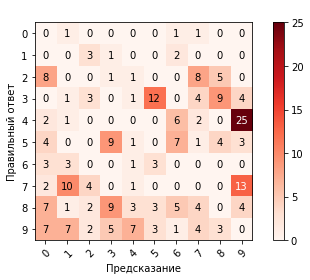

In [312]:
plot_confusion_matrix(test_data['target'].astype(int),
                      preds.astype(int),
                      title=' ',
                      classes=np.unique(test_data['target'].astype(int)),
                      normalize=False,
                      fname='conf_matrix_experiment_4.pdf')
plt.show()

## ЗАПОЛНИТЬ НУЛЯМИ ГЛАВНУЮ ДИАГОНАЛЬ!

In [79]:
indexes_with_errors = np.where(preds != test_data['target'].astype(int))

## Попробуем визуализировать некоторые объекты с ошибками:

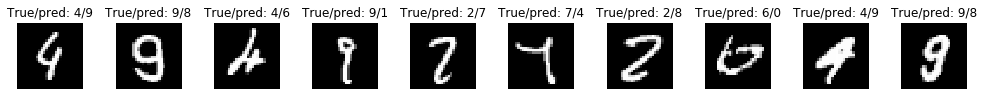

In [80]:
digits_to_show = 10
fig = plt.figure(figsize=(15, 15))
for i in range(digits_to_show):
    ax = fig.add_subplot(1, digits_to_show + 1, i+1)
    ax.imshow(test_data['data'][indexes_with_errors[0][i]].reshape(28, 28), cmap=plt.get_cmap('Greys_r'))
    ax.set_title('True/pred: ' + test_data['target'][indexes_with_errors[0][i]] + '/' + \
                 preds[indexes_with_errors[0][i]].astype(int).astype(str))
    ax.axis("off")
plt.tight_layout()
plt.show()

В большинстве случаев видно, что написаннные цифры немного деформированы и похожи на другие в некоторых чертах

## Experiment №5

## Augmentations on train samples

In [113]:
from sklearn.neighbors import NearestNeighbors
from nearest_neighbors import KNNClassifier
import numpy as np
from distances import euclidean_distance, cosine_distance
from tqdm import tqdm
import time
import pandas as pd

import augmentation_tools
#image preprocessing:
import scipy.ndimage as ndimage
import skimage.transform as transform

In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Rotate by 45 degrees

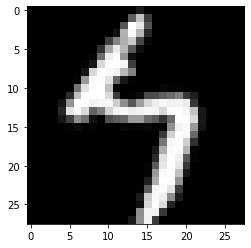

In [115]:
plt.imshow(transform.rotate(train_data['data'][0].reshape(28, 28), 45, resize=False), cmap='Greys_r')

## Gaussian blur with sigma = 1.3

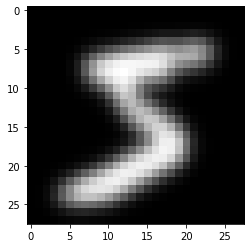

In [116]:
plt.imshow(ndimage.filters.gaussian_filter(train_data['data'][0].reshape(28, 28), 1.3), cmap='Greys_r')

## Pixels shift on y axis

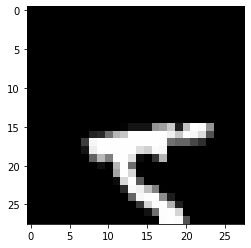

In [117]:
plt.imshow(ndimage.shift(train_data['data'][0].reshape(28, 28), [10, 0]), cmap='Greys_r')

## Pixels shift on x axis

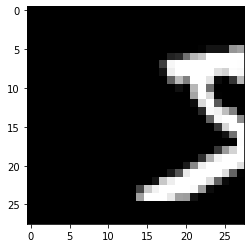

In [118]:
plt.imshow(ndimage.shift(train_data['data'][0].reshape(28, 28), [0, 10]), cmap='Greys_r')

## В этом эксперименте буду использовать жадный алгоритм для поиска лучших параметров(так как перебирать все возможные вариант очень-очень долго): 
1. Найду лучшее значение для величины поворота
2. Найду лучшее значение для смещения
3. Найду лучшее значение для дисперсии фильтра Гаусса
4. Применю аугментацию с 3-мя найденными значениями(предполагая, что это лучшее сочетание)

## Эксперимент провожу с 10000 объектами из трейна и кросс-валидацией на трех фолдах. Увличиваю трейн-выборку в 3 раза на каждом фолде.

In [131]:

type_of_transformation_with_params_dict = {'rotation': [-15, -10, 0, 5, 10, 15],
                                           'shift': [(i, j) for i in range(-3, 4) for j in range(-3, 4)],
                                           'blur': [0.5, 1, 1.5]
                                          }

for type_of_transformation in type_of_transformation_with_params_dict.keys():
    print('Type_of_transformation:', type_of_transformation)
    best_score, best_param = augmentation_tools.find_best_value_of_transformation(
        train_data['data'][:10000],
        train_data['target'][:10000],
        new_objects_amount=len(train_data['data']),
        type_of_transformation=type_of_transformation,
        param_list_of_transformation=type_of_transformation_with_params_dict[type_of_transformation],
        k_neighbors=int(best_model_params['k_neighbors']),
        metric=best_model_params['metric'],
        strategy='brute',
        weights=bool(best_model_params['weight'])
        )
    print('Best param: ', best_param)
    

Type_of_transformation: rotation
Score on -15 param value 0.9484995590140898
Score on -10 param value 0.9502996490410888
Score on 0 param value 0.9448996789301006
Score on 5 param value 0.9537998790880887
Score on 10 param value 0.9561997291510794
Score on 15 param value 0.9535995591160796
Best param:  10
Type_of_transformation: shift
Score on (-3, -3) param value 0.9478994390140874
Score on (-3, -2) param value 0.9474995789920925
Score on (-3, -1) param value 0.9466994689870907
Score on (-3, 0) param value 0.947099568985093
Score on (-3, 1) param value 0.9479994790120885
Score on (-3, 2) param value 0.9482994490210869
Score on (-3, 3) param value 0.9480994890130886
Score on (-2, -3) param value 0.9480994590160875
Score on (-2, -2) param value 0.947099568985093
Score on (-2, -1) param value 0.9465994589860905
Score on (-2, 0) param value 0.9485994490270863
Score on (-2, 1) param value 0.9483993090370825
Score on (-2, 2) param value 0.9482993590300842
Score on (-2, 3) param value 0.9478

In [121]:
# Type_of_transformation: rotation
# Score on -15 param value 0.9484995590140898
# Score on -10 param value 0.9502996490410888
# Score on 0 param value 0.9448996789301006
# Score on 5 param value 0.9537998790880887
# Score on 10 param value 0.9561997291510794
# Score on 15 param value 0.9535995591160796
# Best param:  10
# Type_of_transformation: shift
# Score on (-3, -3) param value 0.9478994390140874
# Score on (-3, -2) param value 0.9474995789920925
# Score on (-3, -1) param value 0.9466994689870907
# Score on (-3, 0) param value 0.947099568985093
# Score on (-3, 1) param value 0.9479994790120885
# Score on (-3, 2) param value 0.9482994490210869
# Score on (-3, 3) param value 0.9480994890130886
# Score on (-2, -3) param value 0.9480994590160875
# Score on (-2, -2) param value 0.947099568985093
# Score on (-2, -1) param value 0.9465994589860905
# Score on (-2, 0) param value 0.9485994490270863
# Score on (-2, 1) param value 0.9483993090370825
# Score on (-2, 2) param value 0.9482993590300842
# Score on (-2, 3) param value 0.9478994690110883
# Score on (-1, -3) param value 0.9477995190040901
# Score on (-1, -2) param value 0.9479995690030911
# Score on (-1, -1) param value 0.948099668995094
# Score on (-1, 0) param value 0.9490997090110932
# Score on (-1, 1) param value 0.9508993790800796
# Score on (-1, 2) param value 0.9490993790440831
# Score on (-1, 3) param value 0.9480994590160875
# Score on (0, -3) param value 0.9482994490210869
# Score on (0, -2) param value 0.9480995790040913
# Score on (0, -1) param value 0.9501998790160959
# Score on (0, 0) param value 0.9448996789301006
# Score on (0, 1) param value 0.9516993091030758
# Score on (0, 2) param value 0.9495991590760756
# Score on (0, 3) param value 0.9483993690310842
# Score on (1, -3) param value 0.9481994690170876
# Score on (1, -2) param value 0.9497995090450857
# Score on (1, -1) param value 0.952499599090083
# Score on (1, 0) param value 0.9526994391100777
# Score on (1, 1) param value 0.9522993091150748
# Score on (1, 2) param value 0.949899159082075
# Score on (1, 3) param value 0.9483993690310842
# Score on (2, -3) param value 0.9477994590100881
# Score on (2, -2) param value 0.9489995790220894
# Score on (2, -1) param value 0.9507995490610849
# Score on (2, 0) param value 0.9510994890730825
# Score on (2, 1) param value 0.9497992690690785
# Score on (2, 2) param value 0.9490992890530805
# Score on (2, 3) param value 0.9483993390340834
# Score on (3, -3) param value 0.9482994790180878
# Score on (3, -2) param value 0.9482994490210869
# Score on (3, -1) param value 0.9488994490330857
# Score on (3, 0) param value 0.9491993890450833
# Score on (3, 1) param value 0.949099409041084
# Score on (3, 2) param value 0.9481994390200867
# Score on (3, 3) param value 0.9481994390200867
# Best param:  (1, 0)
# Type_of_transformation: blur
# Score on 0.5 param value 0.956999599180074
# Score on 1 param value 0.959799489247065
# Score on 1.5 param value 0.9591996392200707
# Best param:  1

In [90]:
# best values:
# rotation - 10
# shift - (1, 0)
# blur - 1

## Посмотрим на качество модели с лучшими параметрами аугментаций с лучшими параметрами:
Rotation - 10
Shift - (1, 0)
Blur - 1

In [147]:
augmentation_tools.find_best_value_of_transformation(train_data['data'][:10000],
                                                     train_data['target'][:10000],
                                                     new_objects_amount=len(train_data['data']),
                                                     type_of_transformation='all',
                                                     param_list_of_transformation=[10, (1, 0), 1],
                                                     k_neighbors=int(best_model_params['k_neighbors']),
                                                     metric=best_model_params['metric'],
                                                     strategy='brute',
                                                     weights=bool(best_model_params['weight'])
                                                    )

Score on [10, (1, 0), 1] param value 0.9551995991440775


(-1, -1)

# Видно, что жадный алгоритм справился плохо с этой задачей, так как при применении только Гауссова размытия качество - 0.959. Попробуем применить эти аугментации не последовательно(расширив выборку только в 2 раза), а отдельно(т.е. получится расширение выборки в 4 раза) 

In [153]:
augmentation_tools.find_best_value_of_transformation(train_data['data'][:10000],
                                                     train_data['target'][:10000],
                                                     new_objects_amount=len(train_data['data']),
                                                     type_of_transformation='all_parallel',
                                                     param_list_of_transformation=[10, (1, 0), 1],
                                                     k_neighbors=int(best_model_params['k_neighbors']),
                                                     metric=best_model_params['metric'],
                                                     strategy='brute',
                                                     weights=bool(best_model_params['weight'])
                                                    )

Score on [10, (1, 0), 1] param value 0.9632993293330533


(-1, -1)

# Результат лучше почти на 1%,

# Проверим, как изменится качество на тесте, если эти преобразования применить ко всей выборке:

In [313]:
knn_best = KNNClassifier(k=int(best_model_params['k_neighbors']),
                         metric=best_model_params['metric'],
                         strategy='brute',
                         weights=bool(best_model_params['weight'])
                        )

In [155]:
train_data_augmented, train_y_augmented = augmentation_tools.made_augmentation(train_data['data'],
                                                                               train_data['target'],
                                                                               new_objects_amount=len(train_data['data']),
                                                                               type_of_transformation='all_parallel',
                                                                               param_of_transformation=[10, (1, 0), 1]
                                                                              )

In [314]:
knn_best.fit(train_data_augmented,
             train_y_augmented
            )

In [315]:
preds = knn_best.predict(test_data['data'])

In [316]:
import cross_validation
cross_validation.accuracy(preds, test_data['target'].astype(int))

0.9843

In [317]:
#0.9843

Confusion matrix, without normalization
[[ 0  1  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 5  1  0  2  1  0  2  9  1  0]
 [ 0  0  2  0  1  5  0  4  5  3]
 [ 0  0  0  0  0  0  4  3  1 15]
 [ 2  0  0  5  1  0  4  1  1  3]
 [ 3  1  0  0  0  1  0  0  0  0]
 [ 0 12  5  1  1  0  0  0  0  6]
 [ 2  0  1  2  2  4  3  4  0  2]
 [ 2  4  0  2  3  3  1  4  3  0]]


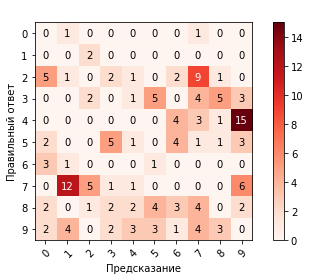

In [318]:
plot_confusion_matrix(test_data['target'].astype(int),
                      preds.astype(int),
                      title=' ',
                      classes=np.unique(test_data['target'].astype(int)),
                      normalize=False,
                      fname='conf_matrix_experiment_5_with_full_aug_on_train.pdf')

## Можно заметить, что качество стало лучше на ~ 1%

## Experiment №6

Сначала проверим уже на обученном knn_best:

In [227]:
%%time
knn_best.fit(train_data['data'], train_data['target'])
preds = augmentation_tools.test_time_augmentation(knn_best,
                                          test_data['data'],
                                          type_of_transformation_list='all_parallel',
                                          param_of_transformation_list=[10, (1, 0), 1]
                                         )




  0%|          | 0/10000 [00:00<?, ?it/s]


100%|██████████| 10000/10000 [00:00<00:00, 4371343.41it/s]

CPU times: user 7min 27s, sys: 9.75 s, total: 7min 37s
Wall time: 1min 21s


In [228]:
import cross_validation

In [229]:
cross_validation.accuracy(preds[:, 0].astype(int), test_data['target'].astype(int))

0.9752

In [230]:
cross_validation.accuracy(preds[:, 1].astype(int), test_data['target'].astype(int))

0.9641

In [231]:
cross_validation.accuracy(preds[:, 2].astype(int), test_data['target'].astype(int))

0.9548

In [232]:
cross_validation.accuracy(preds[:, 3].astype(int), test_data['target'].astype(int))

0.9613

In [233]:
preds_full = np.zeros(preds.shape[0])
for i in tqdm(range(preds.shape[0])):
    preds_full[i] = np.argmax(np.bincount(preds[i, :]))




  0%|          | 0/10000 [00:00<?, ?it/s]


100%|██████████| 10000/10000 [00:00<00:00, 438244.22it/s]

In [234]:
cross_validation.accuracy(preds_full, test_data['target'].astype(int))

0.9734

## ТТА немного ухудшило качетсво работы алгоритма. Попробуем теперь отобрать лучшие параметры для трансформаций с TTA

In [274]:
type_of_transformation_with_params_dict = {'rotation': [-15, -10, -5, 0, 5, 10, 15],
                                           'shift': [(i, j) for i in range(-3, 4) for j in range(-3, 4)],
                                           'blur': [0.5, 1, 1.5]
                                          }

knn_best.fit(train_data['data'], train_data['target'])
for type_of_transformation in type_of_transformation_with_params_dict.keys():
    print(type_of_transformation)
    best_param, best_score = -1, -1
    for param_of_transformation in type_of_transformation_with_params_dict[type_of_transformation]:
        preds = augmentation_tools.test_time_augmentation(knn_best,
                                              test_data['data'],
                                              type_of_transformation_list=type_of_transformation,
                                              param_of_transformation_list=param_of_transformation
                                             )
        print('Score on ' + str(param_of_transformation) + ' param value: ', end='')
        score = cross_validation.accuracy(preds.astype(int),
                                                        test_data['target'].astype(int))
        print(score)
        if score > best_score:
            best_score = score
            best_param = param_of_transformation
    print('Best param: ' + str(best_param) + ' with score: ' + str(best_score))
        

rotation
Score on -15 param value: 0.9758
Score on -10 param value: 0.977
Score on -5 param value: 0.9743
Score on 0 param value: 0.9723
Score on 5 param value: 0.9739
Score on 10 param value: 0.9735
Score on 15 param value: 0.969
Best param: -10 with score: 0.977
shift
Score on (-3, -3) param value: 0.9751
Score on (-3, -2) param value: 0.975
Score on (-3, -1) param value: 0.9747
Score on (-3, 0) param value: 0.9755
Score on (-3, 1) param value: 0.9751
Score on (-3, 2) param value: 0.9753
Score on (-3, 3) param value: 0.9752
Score on (-2, -3) param value: 0.9753
Score on (-2, -2) param value: 0.9758
Score on (-2, -1) param value: 0.9749
Score on (-2, 0) param value: 0.9746
Score on (-2, 1) param value: 0.9746
Score on (-2, 2) param value: 0.9753
Score on (-2, 3) param value: 0.9752
Score on (-1, -3) param value: 0.9753
Score on (-1, -2) param value: 0.9755
Score on (-1, -1) param value: 0.9749
Score on (-1, 0) param value: 0.9747
Score on (-1, 1) param value: 0.9744
Score on (-1, 2) p

In [319]:
type_of_transformation_with_params_dict = {'all_parallel': [[-10, (1, 0), 0.5]]
                                          }

knn_best.fit(train_data['data'], train_data['target'])
for type_of_transformation in type_of_transformation_with_params_dict.keys():
    print(type_of_transformation)
    best_param, best_score = -1, -1
    for param_of_transformation in type_of_transformation_with_params_dict[type_of_transformation]:
        preds = augmentation_tools.test_time_augmentation(knn_best,
                                              test_data['data'],
                                              type_of_transformation_list=type_of_transformation,
                                              param_of_transformation_list=param_of_transformation
                                             )
        print('Score on ' + str(param_of_transformation) + ' param value: ', end='')
        score = cross_validation.accuracy(preds.astype(int),
                                                        test_data['target'].astype(int))
        print(score)
        if score > best_score:
            best_score = score
            best_param = param_of_transformation
    print('Best param: ' + str(best_param) + ' with score: ' + str(best_score))

all_parallel
Score on [-10, (1, 0), 0.5] param value: 0.976
Best param: [-10, (1, 0), 0.5] with score: 0.976


Confusion matrix, without normalization
[[ 0  1  0  0  0  0  0  1  0  0]
 [ 0  0  2  1  0  0  0  0  0  0]
 [ 7  0  0  0  1  0  1 10  5  0]
 [ 0  0  1  0  0  6  0  5 10  5]
 [ 2  1  0  0  0  0  7  2  1 33]
 [ 2  2  0 13  1  0  7  1  8  3]
 [ 4  2  0  0  1  1  0  0  0  0]
 [ 3 10  6  0  0  0  0  0  0  8]
 [ 5  4  2  4  1  1  4  4  0  2]
 [ 8  7  1  3  3  4  1  8  4  0]]


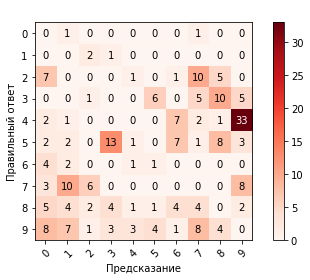

In [320]:
plot_confusion_matrix(test_data['target'].astype(int),
                      preds.astype(int),
                      title=' ',
                      classes=np.unique(test_data['target'].astype(int)),
                      normalize=False,
                      fname='conf_matrix_experiment_6_with_full_aug_on_test.pdf')

## Можно заметить, что применение TTA для тестовой  выборки дало немного лучше результат, чем результат без преобразования тестовой выборки

## Применим сразу два метода аугментаций:

In [ ]:
knn_best.fit(train_data_augmented, train_y_augmented)
type_of_transformation_with_params_dict = {'all_parallel': [[-10, (1, 0), 0.5]]
                                          }


for type_of_transformation in type_of_transformation_with_params_dict.keys():
    print(type_of_transformation)
    best_param, best_score = -1, -1
    for param_of_transformation in type_of_transformation_with_params_dict[type_of_transformation]:
        preds = augmentation_tools.test_time_augmentation(knn_best,
                                              test_data['data'],
                                              type_of_transformation_list=type_of_transformation,
                                              param_of_transformation_list=param_of_transformation
                                             )
        print('Score on ' + str(param_of_transformation) + ' param value: ', end='')
        score = cross_validation.accuracy(preds.astype(int),
                                                        test_data['target'].astype(int))
        print(score)
        if score > best_score:
            best_score = score
            best_param = param_of_transformation
    print('Best param: ' + str(best_param) + ' with score: ' + str(best_score))

all_parallel


0.9835

In [ ]:
plot_confusion_matrix(test_data['target'].astype(int),
                      preds.astype(int),
                      title=' ',
                      classes=np.unique(test_data['target'].astype(int)),
                      normalize=False,
                      fname='conf_matrix_experiment_6_with_full_aug_on_train_and_test.pdf')

## Результат стал немного хуже, чем только с аугментациями трейна. Возможно, это из-за того, что я применяю разные аугментации к трейну и к тесту. Попробую одни и те же:

In [279]:
knn_best.fit(train_data_augmented, train_y_augmented)
type_of_transformation_with_params_dict = {'all_parallel': [[-10, (1, 0), 1.5]]
                                          }


for type_of_transformation in type_of_transformation_with_params_dict.keys():
    print(type_of_transformation)
    best_param, best_score = -1, -1
    for param_of_transformation in type_of_transformation_with_params_dict[type_of_transformation]:
        preds = augmentation_tools.test_time_augmentation(knn_best,
                                              test_data['data'],
                                              type_of_transformation_list=type_of_transformation,
                                              param_of_transformation_list=param_of_transformation
                                             )
        print('Score on ' + str(param_of_transformation) + ' param value: ', end='')
        score = cross_validation.accuracy(preds.astype(int),
                                                        test_data['target'].astype(int))
        print(score)
        if score > best_score:
            best_score = score
            best_param = param_of_transformation
    print('Best param: ' + str(best_param) + ' with score: ' + str(best_score))

all_parallel
Score on [-10, (1, 0), 1.5] param value: 0.9737
Best param: [-10, (1, 0), 1.5] with score: 0.9737


In [ ]:
#0.9763 on  augmentation_tools.test_time_augmentation(knn_best,
#                                           test_data['data'],
#                                           type_of_transformation_list=['all', 'blur', 'rotation'],
#                                           param_of_transformation_list=[[10, (1, 0), 1], 1, 10]
#                                          )
#0.9777 on augmentation_tools.made_augmentation(train_data['data'],
#                                                                                train_data['target'],
#                                                                                new_objects_amount=len(train_data['data']),
#                                                                                type_of_transformation='all',
#                                                                                param_of_transformation=[10, (1, 0), 1]
#     )
# 0.9635 on augmentation_tools.test_time_augmentation(knn_best,
#                                           test_data['data'],
#                                           type_of_transformation_list=['blur'],
#                                           param_of_transformation_list=[1]
#                                          )
# -------------------------PREVIOUS RESULTS WERE MADE ON AUGMENTED TRAIN!!---------------
#--------------------------NOW - standart train!----------------------------------------
#and with identity transform
#0.9684 - on augmentation_tools.test_time_augmentation(knn_best,
#                                           test_data['data'],
#                                           type_of_transformation_list=['blur'],
#                                           param_of_transformation_list=[1]
#                                          )
#

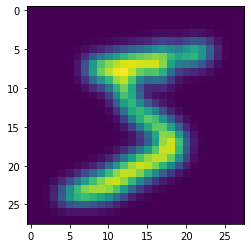